In [27]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()

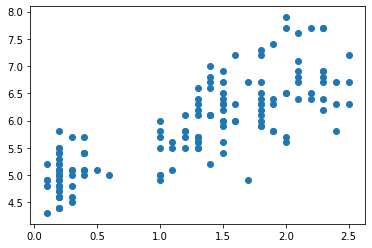

In [28]:
x_vals = ([x[3] for x in iris.data])
y_vals = ([y[0] for y in iris.data])
plt.scatter(x_vals,y_vals)

# Ridge Regression Formula

In [29]:
# make results reproducible
np.random.seed(13)
tf.random.set_seed(13)

deltaA = tf.constant(0,tf.float32)
deltab = tf.constant(0,tf.float32)
loss = tf.constant(0,tf.float32)

$$loss = \sum_{i=1}^{N}\left(y_{i} - \hat{y_{i}} \right)^{2} + λ \sum_{j=0}^{p} A^2 $$


In [39]:
# Create variables for linear regression
A = tf.Variable(tf.random.normal(shape=[1,1]))
b = tf.Variable(tf.random.normal(shape=[1,1]))

ridge_param = tf.constant(1.) # Lamda value
ridge_loss = tf.reduce_mean(tf.square(A))

epochs = []
loss = []

for i in range(100):
    with tf.GradientTape() as tape:
        model_output = (x_vals * A) + b
        # Linear Regression for L2 Regularization
        loss_ =tf.expand_dims(tf.add(tf.reduce_mean(tf.square(y_vals - model_output)),tf.multiply(ridge_param, ridge_loss)), 0)
        deltaA,deltab = tape.gradient(loss_,[A,b])

        changeA = deltaA * 0.01
        changeb = deltab * 0.01
        
        epochs.append(i)
        loss.append(loss_)

        A.assign_sub(changeA)
        b.assign_sub(changeb)

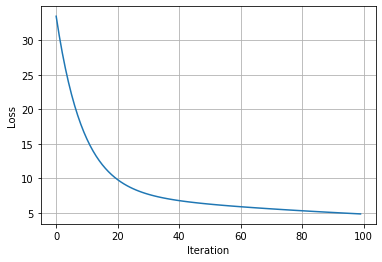

In [40]:
plt.plot(epochs,loss)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid()
plt.show()

In [41]:
best_fit = []
for i in x_vals:
    best_fit.append(A[0][0].numpy() * i + b[0][0].numpy())

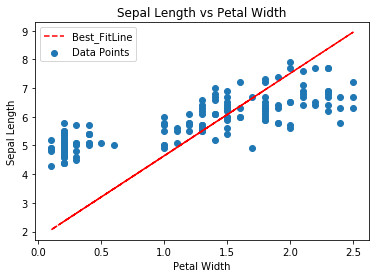

In [42]:
plt.scatter(x_vals,y_vals,label='Data Points')
plt.plot(x_vals,best_fit,'r--',label="Best_FitLine")
plt.legend(loc='upper left')
plt.title('Sepal Length vs Petal Width')
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.show()
